##  Building Location Prediction
 ● Dataset: Building Footprints
 ● Description: Predict the location of new buildings
 based on existing infrastructure and demographics

In [ ]:
Building Location Prediction refers to using data and machine learning to determine or predict the best possible location for a building based on various factors. These factors can include:

Geographical Data – Latitude, longitude, elevation, climate, etc.
Demographic Data – Population density, income levels, consumer behavior, etc.
Economic Data – Property values, real estate trends, business activity, etc.
Infrastructure & Accessibility – Roads, public transport, proximity to markets, hospitals, schools,

In [ ]:
!pip install pandas geopandas shapely matplotlib seaborn


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Building_Footprint.csv to Building_Footprint.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Building_Footprint.csv')
df.head()

,the_geom,OBJECTID,GEOPIN,ActiveStatus,Shape.STArea(),Shape.STLength()
0,MULTIPOLYGON (((-89.999379594222 29.9279344103...,60065,41007280.0,1,2426.233765,208.703514
1,MULTIPOLYGON (((-90.078332618614 30.0012424244...,134355,41107356.0,1,2914.563992,264.289626
2,MULTIPOLYGON (((-90.104709625339 29.9997004228...,50372,41012592.0,1,742.930757,111.227489
3,MULTIPOLYGON (((-90.099953622235 29.9444834108...,132138,41048405.0,1,2559.741571,233.559687
4,MULTIPOLYGON (((-89.910320573435 30.0263944348...,149226,41116930.0,1,203331.513022,1892.215165


In [ ]:
df.describe()

,OBJECTID,GEOPIN,ActiveStatus,Shape.STArea(),Shape.STLength()
count,162286.000000,1.620210e+05,162286.0,1.622860e+05,162286.000000
mean,83163.849383,4.111067e+07,1.0,2.381829e+03,198.547159
std,48274.195405,5.587285e+05,0.0,8.894092e+03,149.308136
min,1.000000,4.100000e+07,1.0,3.544447e-02,1.915150
25%,41483.250000,4.103712e+07,1.0,1.029189e+03,141.889057
50%,82880.500000,4.107570e+07,1.0,1.830527e+03,192.871110
75%,124332.750000,4.111418e+07,1.0,2.471146e+03,229.718038
max,170185.000000,5.100326e+07,1.0,1.851412e+06,11184.825467


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162286 entries, 0 to 162287
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   the_geom          162286 non-null  object 
 1   OBJECTID          162286 non-null  int64  
 2   GEOPIN            162021 non-null  float64
 3   ActiveStatus      162286 non-null  int64  
 4   Shape.STArea()    162286 non-null  float64
 5   Shape.STLength()  162286 non-null  float64
 6   geometry          162286 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 9.9+ MB


In [ ]:
df.columns

Index(['the_geom', 'OBJECTID', 'GEOPIN', 'ActiveStatus', 'Shape.STArea()',
       'Shape.STLength()', 'geometry'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
the_geom,0
OBJECTID,0
GEOPIN,265
ActiveStatus,0
Shape.STArea(),0
Shape.STLength(),0
geometry,0


In [ ]:
##all unique values in the GEOPIN column, including NaN, use:
df['GEOPIN'].unique()


array([41007280., 41107356., 41012592., ..., 41137732., 41056241.,
       41101065.])

In [ ]:
## only the unique non-null values:
df['GEOPIN'].dropna().unique()

array([41007280., 41107356., 41012592., ..., 41137732., 41056241.,
       41101065.])

In [ ]:
# safely convert Well-Known Text (WKT) representations of geometries into Shapely geometry objects
def safe_wkt_loads(val):
    """
    Attempt to load a WKT string into a Shapely geometry.
    If the input is not a string (e.g., NaN or float), return None.
    """
    if isinstance(val, str):
        try:
            return wkt.loads(val)
        except Exception as e:
            print(f"Error converting value: {val}\n{e}")
            return None
    else:
        return None

# Apply the safe loader to the 'the_geom' column
df['geometry'] = df['the_geom'].apply(safe_wkt_loads)

# Optionally, remove rows where geometry conversion failed (i.e., geometry is None)
df = df[df['geometry'].notnull()].copy()

print("\nDataFrame after converting 'the_geom' to geometry objects:")
print(df.head())



DataFrame after converting 'the_geom' to geometry objects:
                                            the_geom  OBJECTID      GEOPIN  \
0  MULTIPOLYGON (((-89.999379594222 29.9279344103...     60065  41007280.0   
1  MULTIPOLYGON (((-90.078332618614 30.0012424244...    134355  41107356.0   
2  MULTIPOLYGON (((-90.104709625339 29.9997004228...     50372  41012592.0   
3  MULTIPOLYGON (((-90.099953622235 29.9444834108...    132138  41048405.0   
4  MULTIPOLYGON (((-89.910320573435 30.0263944348...    149226  41116930.0   

   ActiveStatus  Shape.STArea()  Shape.STLength()  \
0             1     2426.233765        208.703514   
1             1     2914.563992        264.289626   
2             1      742.930757        111.227489   
3             1     2559.741571        233.559687   
4             1   203331.513022       1892.215165   

                                            geometry  
0  MULTIPOLYGON (((-89.999379594222 29.9279344103...  
1  MULTIPOLYGON (((-90.078332618614 30.001


DataFrame after converting 'the_geom' to geometry objects:
                                            the_geom  OBJECTID      GEOPIN  \
0  MULTIPOLYGON (((-89.999379594222 29.9279344103...     60065  41007280.0   
1  MULTIPOLYGON (((-90.078332618614 30.0012424244...    134355  41107356.0   
2  MULTIPOLYGON (((-90.104709625339 29.9997004228...     50372  41012592.0   
3  MULTIPOLYGON (((-90.099953622235 29.9444834108...    132138  41048405.0   
4  MULTIPOLYGON (((-89.910320573435 30.0263944348...    149226  41116930.0   

   ActiveStatus  Shape.STArea()  Shape.STLength()  \
0             1     2426.233765        208.703514   
1             1     2914.563992        264.289626   
2             1      742.930757        111.227489   
3             1     2559.741571        233.559687   
4             1   203331.513022       1892.215165   

                                            geometry  
0  MULTIPOLYGON (((-89.999379594222 29.9279344103...  
1  MULTIPOLYGON (((-90.078332618614 30.001

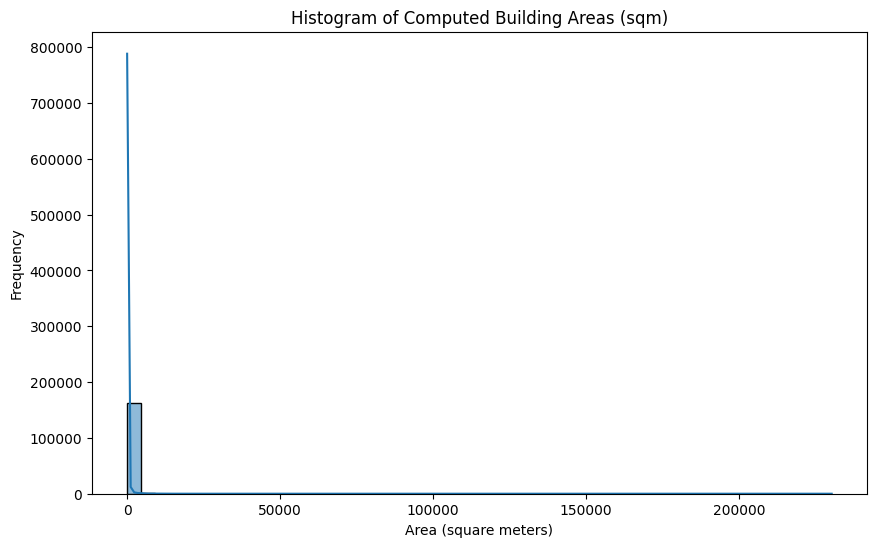

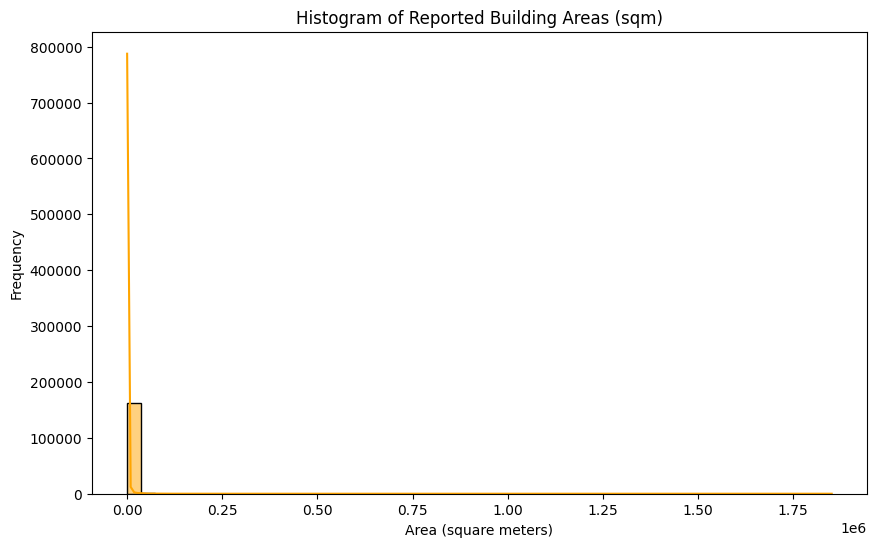

<Figure size 1000x1000 with 0 Axes>

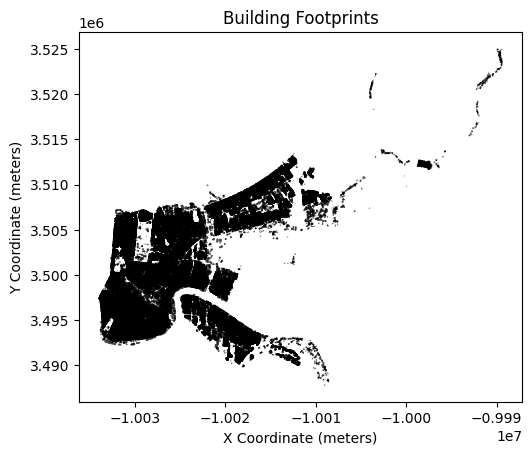


Buildings with computed area greater than the 99th percentile (>1949.21 sqm):
        OBJECTID      GEOPIN  computed_area
4         149226  41116930.0   25289.374753
22        163342  41218856.0    4917.341480
78        112548  41198547.0    6828.727779
80        146523  41110006.0    9867.938021
176       162239  41139646.0    3647.830218
...          ...         ...            ...
161893    146194  41129937.0    2105.035355
161897     46732  41035009.0    7153.480068
161932     58096  41187207.0    3507.348316
161992    164564  51001033.0    2163.203646
162025    169746  41030820.0   24207.782036

[1623 rows x 3 columns]
Number of large buildings: 1623


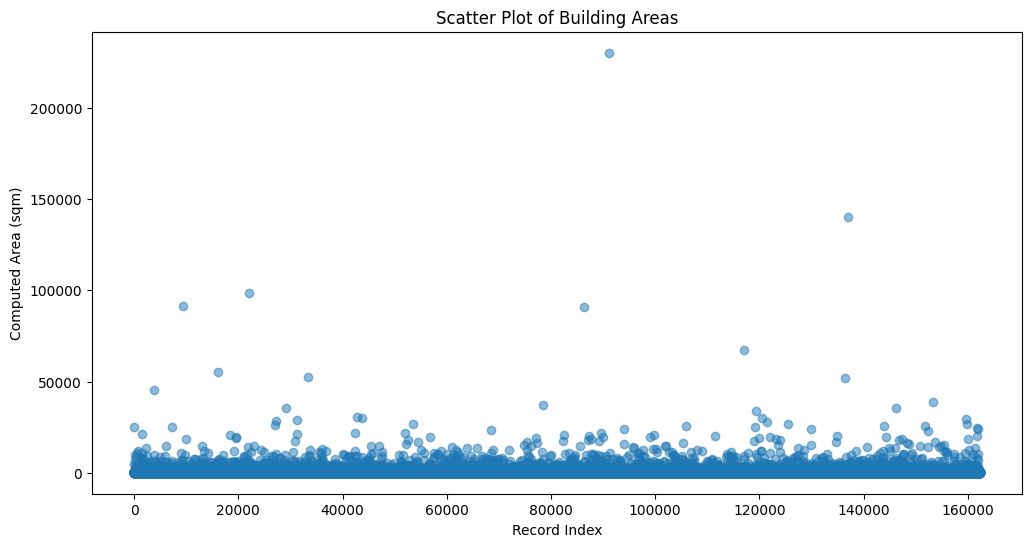

In [ ]:
def safe_wkt_loads(val):
    """
    Attempt to load a WKT string into a Shapely geometry.
    If the input is not a string (e.g., NaN or float), return None.
    """
    if isinstance(val, str):
        try:
            return wkt.loads(val)
        except Exception as e:
            print(f"Error converting value: {val}\n{e}")
            return None
    else:
        return None

# Apply the safe loader to the 'the_geom' column
df['geometry'] = df['the_geom'].apply(safe_wkt_loads)

# Optionally, remove rows where geometry conversion failed (i.e., geometry is None)
df = df[df['geometry'].notnull()].copy()

print("\nDataFrame after converting 'the_geom' to geometry objects:")
print(df.head())

# ---------------------------
# 3. Create a GeoDataFrame
# ---------------------------
# Assume the data is in WGS84 (EPSG:4326) unless you know otherwise.
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Re-project the GeoDataFrame to a metric CRS for accurate area calculations.
# Here, we use EPSG:3857 (Web Mercator) as an example.
gdf = gdf.to_crs(epsg=3857)

# ---------------------------
# 4. Exploratory Data Analysis (EDA)
# ---------------------------
# Compute the area of each building footprint from the geometry (in square meters)
gdf['computed_area'] = gdf.geometry.area

# Print descriptive statistics for the reported and computed areas
print("\nDescriptive Statistics for Reported Area (Shape.STArea()):")
print(gdf['Shape.STArea()'].describe())

print("\nDescriptive Statistics for Computed Area (from geometry):")
print(gdf['computed_area'].describe())

# ---------------------------
# 5. Visualizations
# ---------------------------
# Histogram of computed building areas
plt.figure(figsize=(10, 6))
sns.histplot(gdf['computed_area'], bins=50, kde=True)
plt.title("Histogram of Computed Building Areas (sqm)")
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency")
plt.show()

# Histogram of reported building areas for comparison
plt.figure(figsize=(10, 6))
sns.histplot(gdf['Shape.STArea()'], bins=50, kde=True, color='orange')
plt.title("Histogram of Reported Building Areas (sqm)")
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency")
plt.show()

# Plot the building footprints on a map
plt.figure(figsize=(10, 10))
gdf.plot(edgecolor='black', facecolor='none', alpha=0.7)
plt.title("Building Footprints")
plt.xlabel("X Coordinate (meters)")
plt.ylabel("Y Coordinate (meters)")
plt.show()

# ---------------------------
# 6. Identify Potential Outliers
# ---------------------------
# Consider buildings with computed area above the 99th percentile as potential outliers.
threshold = gdf['computed_area'].quantile(0.99)
print(f"\nBuildings with computed area greater than the 99th percentile (>{threshold:.2f} sqm):")
large_buildings = gdf[gdf['computed_area'] > threshold]
print(large_buildings[['OBJECTID', 'GEOPIN', 'computed_area']])
print(f"Number of large buildings: {large_buildings.shape[0]}")

# ---------------------------
# 7. Additional Analysis (Optional)
# ---------------------------
# A scatter plot of building area vs. record index
plt.figure(figsize=(12, 6))
plt.scatter(gdf.index, gdf['computed_area'], alpha=0.5)
plt.title("Scatter Plot of Building Areas")
plt.xlabel("Record Index")
plt.ylabel("Computed Area (sqm)")
plt.show()